In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import scipy.stats
import pylab
sns.set()

In [3]:
file_path = Path('data/Month_Value_1.csv')

In [5]:
df = pd.read_csv(file_path)

In [7]:
df.head(3)

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0
1,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0
2,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0


In [9]:
df_copy = df.copy()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Period                                    96 non-null     object 
 1   Revenue                                   64 non-null     float64
 2   Sales_quantity                            64 non-null     float64
 3   Average_cost                              64 non-null     float64
 4   The_average_annual_payroll_of_the_region  64 non-null     float64
dtypes: float64(4), object(1)
memory usage: 3.9+ KB


In [13]:
df.describe()

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
count,6.400000e+01,64.000000,64.000000,6.400000e+01
mean,3.236045e+07,19197.375000,1695.061159,2.869083e+07
std,1.164150e+07,6591.287257,296.844793,1.057191e+06
min,1.402148e+07,8314.000000,1110.576805,2.740647e+07
25%,2.242655e+07,15065.500000,1499.142841,2.782857e+07
50%,3.209088e+07,18368.000000,1654.399798,2.819785e+07
75%,3.992999e+07,22856.250000,1916.401096,2.987852e+07
max,5.875647e+07,38069.000000,2559.328184,3.002468e+07


In [15]:
# function returs true if the answer is NA, false if answer is not NA
df.isna()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
91,False,True,True,True,True
92,False,True,True,True,True
93,False,True,True,True,True
94,False,True,True,True,True


In [17]:
df.isna().sum()

Period                                       0
Revenue                                     32
Sales_quantity                              32
Average_cost                                32
The_average_annual_payroll_of_the_region    32
dtype: int64

In [19]:
df.Revenue.isna().sum()

32

<Axes: title={'center': 'Revenue'}>

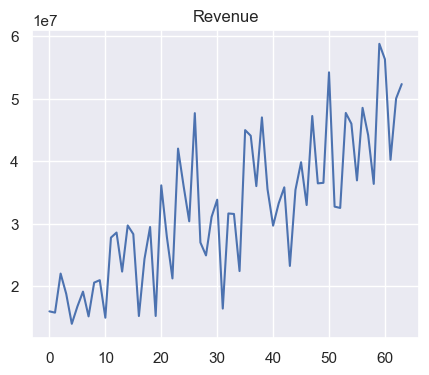

In [21]:
df.Revenue.plot(figsize=(5, 4), title = 'Revenue')

<Axes: title={'center': 'Sales_quantity'}>

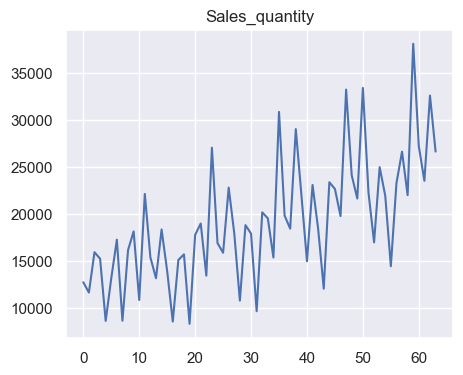

In [23]:
df.Sales_quantity.plot(figsize=(5, 4), title='Sales_quantity')

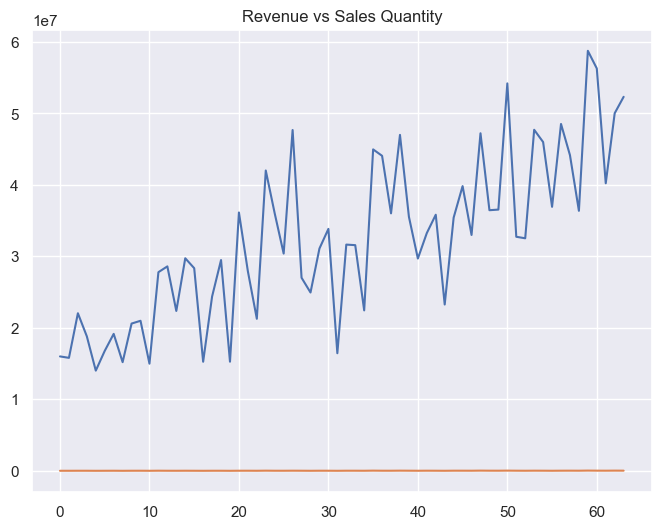

In [25]:
df.Revenue.plot(figsize=(8, 6), title = 'Revenue')
df.Sales_quantity.plot(figsize=(8, 6), title='Sales_quantity')
plt.title('Revenue vs Sales Quantity')
plt.show()

The QQ plot

In [29]:
import scipy.stats
import pylab

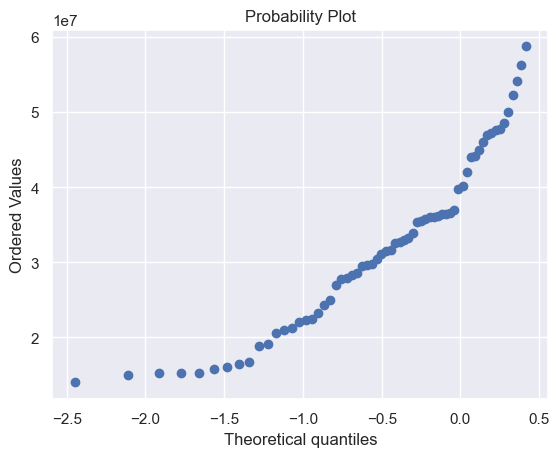

In [31]:
scipy.stats.probplot(df.Revenue, plot=pylab)
plt.show()

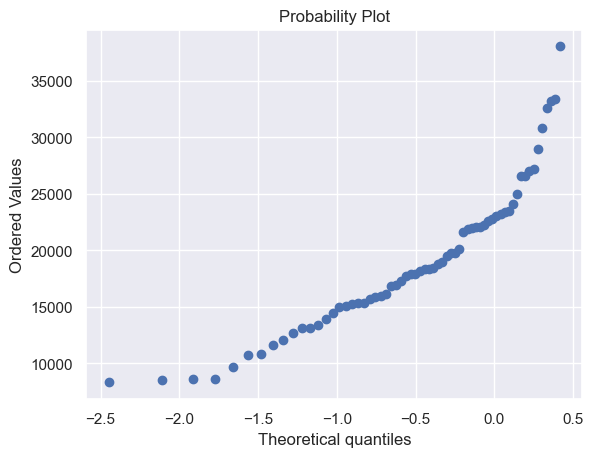

In [33]:
scipy.stats.probplot(df.Sales_quantity, plot=pylab)
plt.show()

### Lesson 2

Length of the Time Period

In [35]:
df.Period.describe()  

count             96
unique            96
top       01.01.2015
freq               1
Name: Period, dtype: object

In [37]:
df['date'] = pd.to_datetime(df.Period, dayfirst = True)

In [39]:
print(df.date.dtypes)

datetime64[ns]


In [41]:
df.date.head(3)

0   2015-01-01
1   2015-02-01
2   2015-03-01
Name: date, dtype: datetime64[ns]

In [43]:
df[['Period', 'Revenue', 'date']].head(5)

,Period,Revenue,date
0,01.01.2015,1.601007e+07,2015-01-01
1,01.02.2015,1.580759e+07,2015-02-01
2,01.03.2015,2.204715e+07,2015-03-01
3,01.04.2015,1.881458e+07,2015-04-01
4,01.05.2015,1.402148e+07,2015-05-01


In [45]:
df.date.describe()

count                     96
mean     2018-12-16 05:00:00
min      2015-01-01 00:00:00
25%      2016-12-24 06:00:00
50%      2018-12-16 12:00:00
75%      2020-12-08 18:00:00
max      2022-12-01 00:00:00
Name: date, dtype: object

In [47]:
df.date.describe()

count                     96
mean     2018-12-16 05:00:00
min      2015-01-01 00:00:00
25%      2016-12-24 06:00:00
50%      2018-12-16 12:00:00
75%      2020-12-08 18:00:00
max      2022-12-01 00:00:00
Name: date, dtype: object

#### Setting the Index

In [49]:
df.set_index('date', inplace = True)

In [51]:
df.head(3)

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
date,,,,,
2015-01-01,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0
2015-02-01,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0
2015-03-01,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0


In [140]:
# df['date']
# df.date.describe()
#error because we already set that to index

#### Setting the Desired Frequency
'h' - hourly \
'w' - weekly \
'd' - daily  \
'm' - monthly \
'a' - annual, rather then yearly so not 'y'

In [53]:
df.asfreq('YE')
# df.asfreq('m')
# df.asfreq('d')

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
date,,,,,
2015-12-31,NaN,NaN,NaN,NaN,NaN
2016-12-31,NaN,NaN,NaN,NaN,NaN
2017-12-31,NaN,NaN,NaN,NaN,NaN
2018-12-31,NaN,NaN,NaN,NaN,NaN
2019-12-31,NaN,NaN,NaN,NaN,NaN
2020-12-31,NaN,NaN,NaN,NaN,NaN
2021-12-31,NaN,NaN,NaN,NaN,NaN


#### Handling Missing Values

In [55]:
# df.isna()
df.isna().sum()

Period                                       0
Revenue                                     32
Sales_quantity                              32
Average_cost                                32
The_average_annual_payroll_of_the_region    32
dtype: int64

#### fillna()
1) Front Filling:
   Assigns the value of the previous period
2) Back Filling:
   Assigns the value for the next period
3) Assigning the same value:
   Assign the average to all the missing values within the time-series

In [57]:
df.Revenue = df.Revenue.fillna(method='ffill')

C:\Users\khali\AppData\Local\Temp\ipykernel_17112\4183389567.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.Revenue = df.Revenue.fillna(method='ffill')


In [59]:
df.isna().sum()

Period                                       0
Revenue                                      0
Sales_quantity                              32
Average_cost                                32
The_average_annual_payroll_of_the_region    32
dtype: int64

In [71]:
df.Sales_quantity = df.Sales_quantity.fillna(method='bfill')

C:\Users\khali\AppData\Local\Temp\ipykernel_17112\3856916818.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.Sales_quantity = df.Sales_quantity.fillna(method='bfill')


In [73]:
df.isna().sum()

Period                                       0
Revenue                                      0
Sales_quantity                               0
Average_cost                                32
The_average_annual_payroll_of_the_region    32
dtype: int64

In [75]:
df.Average_cost = df.Average_cost.fillna(value = df.Average_cost.mean())

In [77]:
df.isna().sum()

Period                                       0
Revenue                                      0
Sales_quantity                               0
Average_cost                                 0
The_average_annual_payroll_of_the_region    32
dtype: int64

In [79]:
df.Sales_quantity.mean()
# df.Sales_quantity.meadian()
# df.Sales_quantity.mode()

21669.916666666668

#### Simplifying the Dataset

In [81]:
df['market_value'] = df.Revenue * df.Average_cost

In [83]:
df.describe().head(4)

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region,market_value
count,9.600000e+01,96.000000,96.000000,6.400000e+01,9.600000e+01
mean,3.901387e+07,21669.916667,1695.061159,2.869083e+07,6.694340e+10
std,1.339186e+07,6416.117883,241.734094,1.057191e+06,2.534312e+10
min,1.402148e+07,8314.000000,1110.576805,2.740647e+07,2.013689e+10


To delete multiple columns at once you can do: \
``` del df['market_value'], df['Revenue'], df['Average_cost'] ```

In [85]:
del df['market_value']  # to delete columns

In [87]:
del df['Sales_quantity'], df['Average_cost'], df['The_average_annual_payroll_of_the_region']

In [89]:
df.describe() # market value is already removed and no longer visible

,Revenue
count,9.600000e+01
mean,3.901387e+07
std,1.339186e+07
min,1.402148e+07
25%,2.853894e+07
50%,4.002840e+07
75%,5.232069e+07
max,5.875647e+07


#### Splitting the Data
To conduct successfull Machine Learning we need to split our available data into 2 sets:
* Training Set
* Testing Set \
The goal is to have the option of feeding new information into the model and comparing its predictions to actual values. \
The closer the forecasts match the actual values, the better our model performs. \
We usually shuffle the data before splitting but in Time-Series data shuffling is impossible. Time-Series data relies on keeping the chronological order of the values within the set. 
```Training set``` should include all values from the beginning of the data up to a specific point in time. \
```Testing set``` should include all values from the cut off point until the end. \
Training Set size: if it's too large, the model will fit the training set too well and will perform poorly with the new data. If it's too small, we won't be able to create a model accurate enough. Ex:(80%, 20% split is reasonable)

To split the data we need to use iloc method, which comes from index location

In [91]:
size = int(len(df)*0.8)  # 80 %

In [93]:
df_train = df.iloc[:size] # from the beginning up to 80% -->> training set

In [95]:
df_test = df.iloc[size:] # from 80% up to the end -->> testing set

In [97]:
df = df_train

In [99]:
df.tail()  # look its last and df_test first elements are not same but consecutively

,Period,Revenue
date,,
2020-12-01,01.12.2020,5.232069e+07
2021-01-01,01.01.2021,5.232069e+07
2021-02-01,01.02.2021,5.232069e+07
2021-03-01,01.03.2021,5.232069e+07
2021-04-01,01.04.2021,5.232069e+07


In [101]:
df_test.head()

,Period,Revenue
date,,
2021-05-01,01.05.2021,5.232069e+07
2021-06-01,01.06.2021,5.232069e+07
2021-07-01,01.07.2021,5.232069e+07
2021-08-01,01.08.2021,5.232069e+07
2021-09-01,01.09.2021,5.232069e+07


### Lesson 3

`White Noise` is a special type of Time-Series, where the data doesn't follow a pattern. \
Since no pattern can be found, we can't predict White Noise. \
In order to consider a Series as White Noise, it need to satisfy the following 3 conditions by having a :
* Constant Mean
* Constant Variance
* No Autocorrelation

White Noise is a sequence of random data, where every value has a time-period associated with it. We can say it behaves sporadically so there is no way to successfully project it into the future.

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
from pathlib import Path
sns.set()

In [105]:
file_path = Path('data/Month_Value_1.csv')

In [107]:
df = pd.read_csv(file_path)

In [109]:
df['date'] = pd.to_datetime(df.Period, dayfirst=True)

In [111]:
df.set_index('date', inplace=True)

In [113]:
df = df.asfreq('b')

In [115]:
df = df.fillna(method='ffill')

C:\Users\khali\AppData\Local\Temp\ipykernel_17112\569672361.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


what will we do: \
Generate White Noise data and plot its values. \
Plotting the graph of the Revenue closing prices and compare the two.

In [117]:
del df['Sales_quantity'], df['Average_cost']

In [119]:
del df['Period']

In [121]:
size = int(len(df)*0.8)  # 80 %
df_train, df_test = df.iloc[:size], df.iloc[size:] 
df = df_train

### White Noise

In [123]:
wn = np.random.normal(loc=df.Revenue.mean(), scale=df.Revenue.std(), size=len(df))

In [125]:
# adding the white noise to the data frame
df['wn'] = wn

White Noise values generated are Normally Distributed around the mean of the Revenue. \
Since each one is generated individually, the average does not have to end up being the same.

In [127]:
df.describe()

,Revenue,The_average_annual_payroll_of_the_region,wn
count,1.652000e+03,1.652000e+03,1.652000e+03
mean,3.556920e+07,2.875318e+07,3.598884e+07
std,1.261042e+07,9.646052e+05,1.276730e+07
min,1.402148e+07,2.740647e+07,-9.533846e+06
25%,2.438566e+07,2.782857e+07,2.705067e+07
50%,3.326107e+07,2.904500e+07,3.602625e+07
75%,4.699599e+07,2.987852e+07,4.427866e+07
max,5.628830e+07,3.002468e+07,8.486761e+07


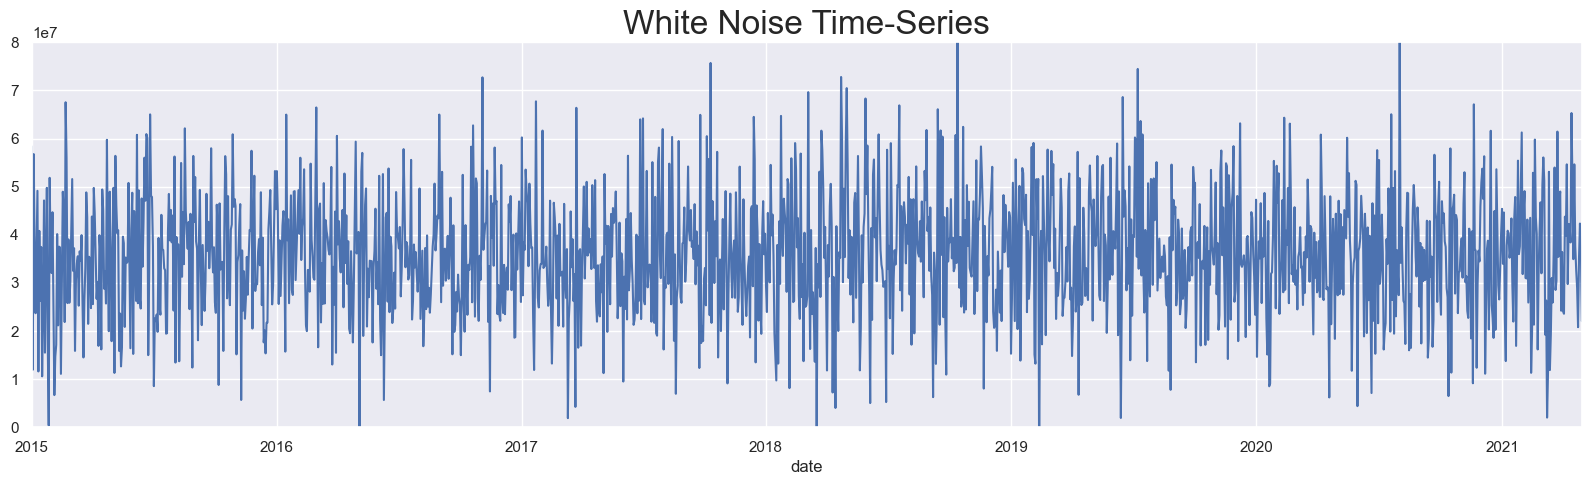

In [129]:
df.wn.plot(figsize = (20, 5))
plt.title('White Noise Time-Series', size = 24)
plt.ylim(0,80000000)  # y axis magnitude limit
plt.show()

On the y axis of both graphs you can see the same magnitude. It will be easier to compare both of them.

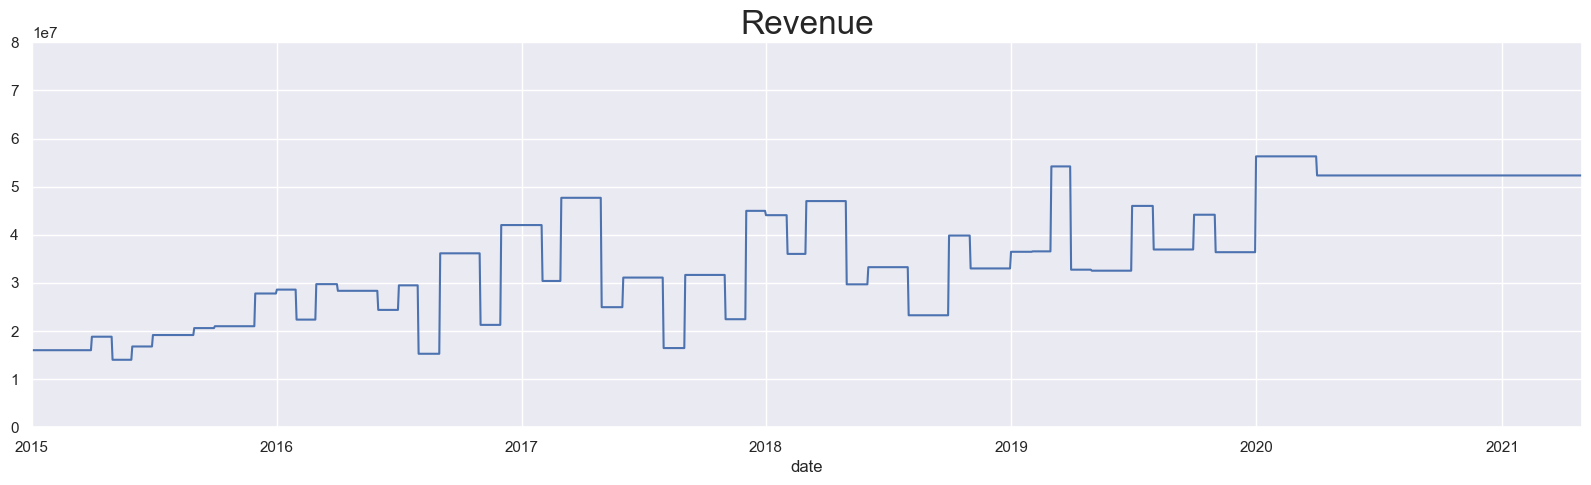

In [131]:
# now lets compare between two
df.Revenue.plot(figsize = (20, 5))
plt.title('Revenue', size = 24)
plt.ylim(0,80000000) # this sets limit to y axis
plt.show()

### Random Walk in Time-Series
Random Walk is a special type of time-series, where values tend to persist over time and the differences between periods are simply white noise.

In [133]:
df.head()

,Revenue,The_average_annual_payroll_of_the_region,wn
date,,,
2015-01-01,1.601007e+07,30024676.0,5.834866e+07
2015-01-02,1.601007e+07,30024676.0,1.192858e+07
2015-01-05,1.601007e+07,30024676.0,5.675961e+07
2015-01-06,1.601007e+07,30024676.0,3.702671e+07
2015-01-07,1.601007e+07,30024676.0,2.369370e+07


Small variations between consecutive time periods \
Cyclical increases and decreases in short periods of time   below...

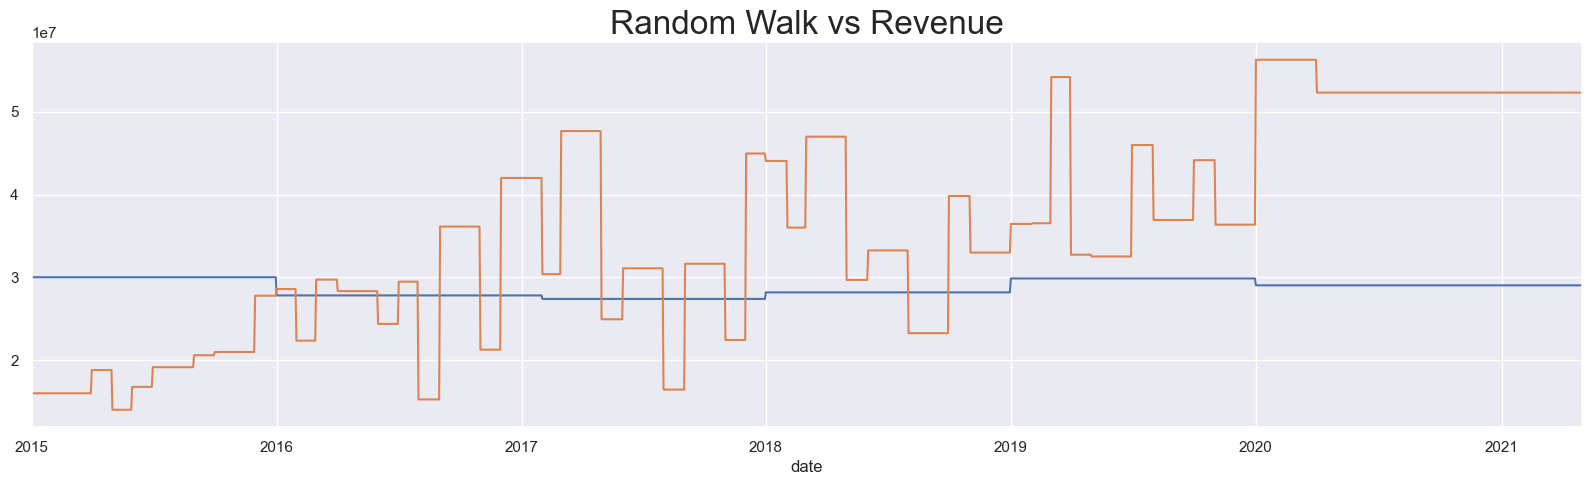

In [532]:
df.rw.plot(figsize = (20, 5))
df.Revenue.plot()
plt.title("Random Walk vs Revenue", size = 24)
plt.show()

### Market Efficiency
Market Efficiency measures the level of difficulty in forecasting correct values. \
For example, if a time series resembles a random walk the prices can't be predicted with great accuracy. Conversely if future prices can be predicted with great accuracy then there are `Arbitrage` opportunities. Arbitrage - Buy and sell commodities and make a safe profit, while the price adjusts. 

### Stationarity
Time-Series Stationarity implies that taking consecutive samples of data with the same size should have identical covariances regardless of the starting point. This characteristics of the data is also known as `weak-form stationarity` or `covariance stationarity`. \
We can classify a time series as covariance stationarity if it satisfies three key assumptions by having: 
* Constant Mean
* Constant Variance
* Consistent covariance between periods at an identical distance from one another. In other words, we want to have the same covariance between the first and fourth period as we do for the third and sixth since they are three intervals apart. An Obvious example of a weak-form stationary process is `White Noise`. Mean = 0 for White Noise, always. And variance stays the same. Auto-Correlation between lags is always 0. `Struct Stationarity` where samples of identical size would have identical distributions. (Rarely observed in nature) so in statistics \
`Stationary = Covariance Stationarity`

### Determining Weak Form Stationarity in Time-Series
To conduct proper time series analyses, it is vital to determine whether the data follows a `stationary` or `non-stationary` process -->> to check this use `Dickey-Fuller Test` or `(DF test)` for sort. \
Hypotheses: 
* H0: Assumes non stationarity  --- if p > 0.05
* H1: Assumes stationarity      --- if p < 0.05

If statistic is lower than the critical value then we reject the H0, so our data comes from stationary process.

### Stationarity

In [135]:
sts.adfuller(df.Revenue)
# line1 - test statistic
# line 5 - 7, % critical values fro Dickey-Filler table
# line 2 - p value associated with the t-statistic, 0.1707. this suggests that there is
# roughly 17% chance of not rejecting the H0.
# line 3 - number of lags used in the regression when determining the t-statistic, 23. So
# there is some autocorrelation going back 23 periods.
# we will take this into account when picking the appropriate model.
# last line - estimates the maximized information criteria provided there is some apparent
# autocorrelation. The lower the values, the easier it is to make predictions for the future.

(-2.3038088212503687,
 0.17074249338570924,
 23,
 1628,
 {'1%': -3.4343731208729635,
  '5%': -2.8633169753343646,
  '10%': -2.5677160229913856},
 51640.42029785899)

In [137]:
sts.adfuller(df.wn)
# Since there is no autocorrelation in White Noise, there should be no lags involved in the 
# regression.
# p-value close to 0.0 and no lags being part of the regression which is 0.

(-18.88589963696798,
 0.0,
 4,
 1647,
 {'1%': -3.4343266370047805,
  '5%': -2.863296457495669,
  '10%': -2.567705097465208},
 57803.22519541519)

In [141]:
sts.adfuller(df.rw)
# you can see that p-value is high so fails to reject H0 (means non-stationary)

We expcet `Random Walks` to be a `non-stationary` process.
Chance dictates that we can have intervals of alternating ups and downs in prices, as well as once with constant increate. The covariances of two such intervals with identical size would very rarely be equal. Thus unlike `white-noise` we expect them to be a non-stationary process. Hence these results satisfy our expectations.

### Seasonality in Time-Series
Seasonality means that trends will appear on a cyclical basis. For example, temperature rises and falls based on the times of day and months of the year. These are two distinct seasonal pattern examples we observe in our daily lives. There are several ways of testing for seasonality.

Decomposition \
Split up time series into 3 effects:
* Trend -> Pattern
* Seasonal -> Cyclical effects
* Residual -> Error of prediction (or the difference between the actual data and the model we fit)

The simplest type of Decomposition is called `naive`. With Naive Decomposition we expect a linear relationship between the three parts and the observed time series. \
Two approaches to naive decomposition: `additive` or `multiplicative`.
* Additive:--> observed = trend + seasonal + residual
* Multiplicative:--> observed = trend * seasonal * residual

Graph Analyses as Example... \
First graph line plot is for observed data. \
Residuals are the difference between true values and predictions for any period, last graph in this example. As you can see, residuals vary greatly around the 2017 and 2018, and 2019. this can be explained by the instability caused by dot-com adn housing prices bubbles respectively. (this is just example). Overall, results of the `additive decomposition` suggest no seasonality in the data. \
Seasonal sequence has no clear pattern in both graphs for both decompositions and trend closely resembles the observed series in both.  (here i am just describing two plots, for further analyses, i can just read and try to memorize what has happened and why, observed series, trend, seasonal, and residuals, seasonal is square shaped because no clear patter, there is increase and decrease all the time.)

#### Seasonality

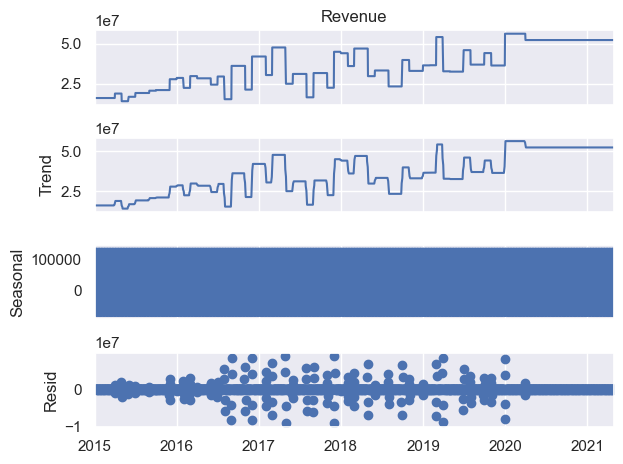

In [143]:
s_dec_additive = seasonal_decompose(df.Revenue, model = 'additive')
s_dec_additive.plot()
plt.show()

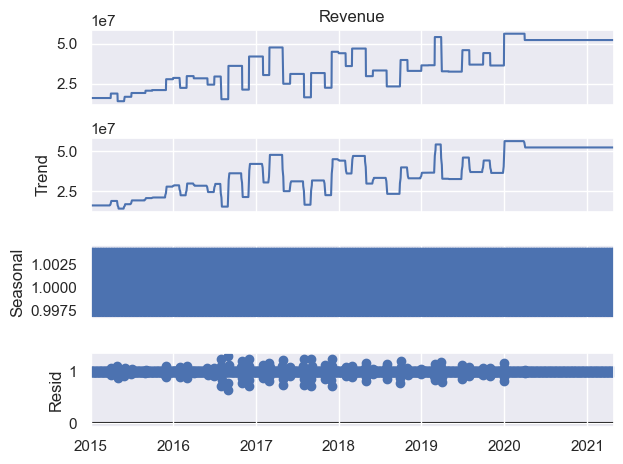

In [145]:
s_dec_multiplicative = seasonal_decompose(df.Revenue, model = 'multiplicative')
s_dec_multiplicative.plot()
plt.show()

we conclude that there is no seasonality among Revenue prices (example) \
Since the trend follows actual data (observed) closely, we will have a closer look at the correlation between past and present values.

In [650]:
# import numpy as np
# import pandas as pd
# import plotly.graph_objs as go
# from plotly.subplots import make_subplots

# # Generating white noise data
# np.random.seed(42)
# time = np.arange(100)
# revenue = np.random.normal(size=100)

# # Creating a DataFrame
# df = pd.DataFrame({'Time': time, 'Revenue': revenue})

# # Creating the 3D plot
# fig = make_subplots(specs=[[{'type': 'scatter3d'}]])
# scatter = go.Scatter3d(x=df['Time'], y=df['Revenue'], z=df['Revenue'],
#                        mode='markers',
#                        marker=dict(size=5, color=df['Revenue'], colorscale='Viridis'))

# fig.add_trace(scatter)

# # Updating layout
# fig.update_layout(scene=dict(
#     xaxis_title='Time',
#     yaxis_title='Revenue',
#     zaxis_title='Revenue'),
#     title='3D Plot of White Noise Data')

# fig.show()

In [654]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Parameters
# np.random.seed(42)
# num_steps = 100
# initial_price = 100

# # Generating random steps
# steps = np.random.normal(loc=0, scale=1, size=num_steps)

# # Random walk
# price = np.cumsum(steps) + initial_price

# # Plotting the random walk
# plt.plot(price, label='Stock Price')
# plt.xlabel('Time')
# plt.ylabel('Price')
# plt.title('Random Walk - Stock Prices')
# plt.legend()
# plt.show()

In [652]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from statsmodels.tsa.stattools import adfuller

# # Generating a random walk
# np.random.seed(42)
# num_steps = 100
# steps = np.random.normal(loc=0, scale=1, size=num_steps)
# price = np.cumsum(steps) + 100

# # Plotting the time series
# plt.plot(price, label='Random Walk')
# plt.xlabel('Time')
# plt.ylabel('Price')
# plt.title('Random Walk Time Series')
# plt.legend()
# plt.show()

# # Performing the Dickey-Fuller test
# result = adfuller(price)
# print('ADF Statistic:', result[0])
# print('p-value:', result[1])

#### ACF - Autocorrelation Function

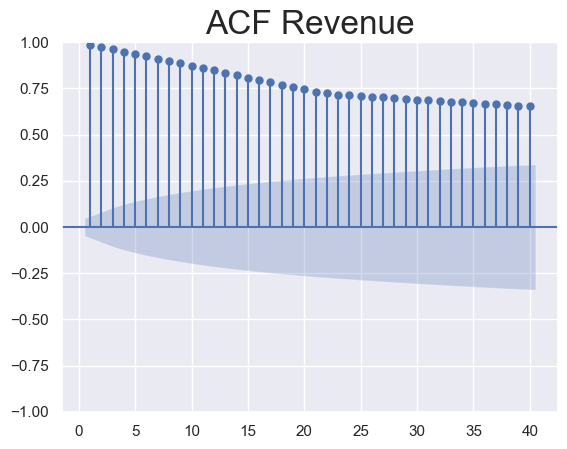

In [147]:
sgt.plot_acf(df.Revenue, lags = 40, zero = False)
plt.title('ACF Revenue', size = 24)
plt.show()

In both graphs you can see that there is no autocorrelation, after update there is autocorrelation

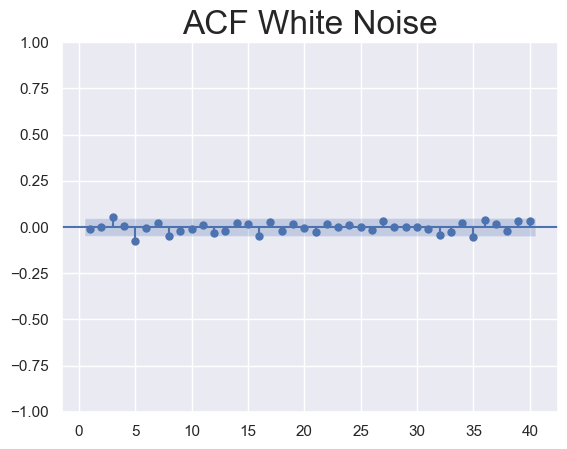

In [150]:
# ACF values for White Noise
sgt.plot_acf(df.wn, lags = 40, zero = False)
plt.title('ACF White Noise', size = 24)
plt.show()

#### PACF - Partial Autocorrelation Function

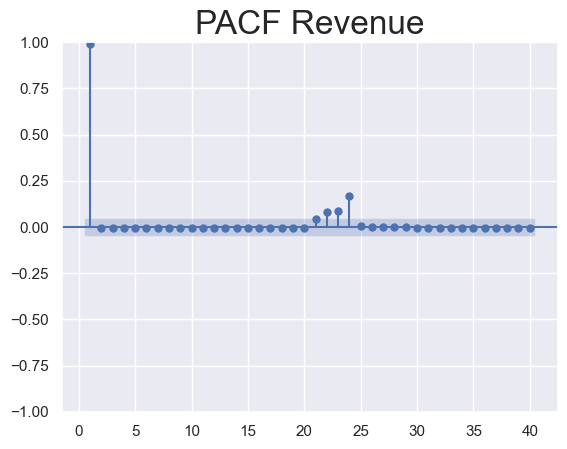

In [152]:
sgt.plot_pacf(df.Revenue, lags = 40, zero = False, method = ('ols'))
plt.title('PACF Revenue', size = 24)
plt.show()

It cancels out all additional channels a previous period value affects the present one

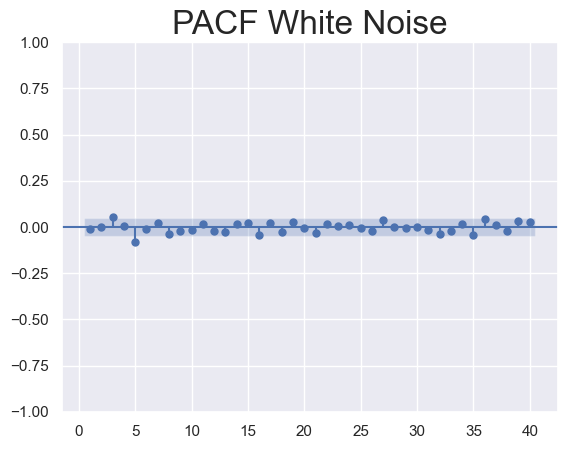

In [154]:
sgt.plot_pacf(df.wn, lags = 40, zero = False, method = ('ols'))
plt.title('PACF White Noise', size = 24)
plt.show()

ACF includes direct and indirect while PACF only includes direct \
Looking at PACF we can check how many lags we want to take for our model

### The AR(1) Model

In [156]:
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [163]:
# model_ar = ARMA(df.Revenue, order = (1, 0))
model_ar = SARIMAX(df.Revenue, order=(1, 0, 0))
results_ar = model_ar.fit()
print(results_ar.summary())

                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                 1652
Model:               SARIMAX(1, 0, 0)   Log Likelihood              -26240.522
Date:                Sun, 09 Feb 2025   AIC                          52485.044
Time:                        05:44:28   BIC                          52495.864
Sample:                    01-01-2015   HQIC                         52489.056
                         - 04-30-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9988      0.001    824.905      0.000       0.996       1.001
sigma2      3.655e+12   5.08e-18    7.2e+29      0.000    3.65e+12    3.65e+12
Ljung-Box (L1) (Q):                   0.00   Jarque-

From above results, look at coeff for ar.L1 it has -0.0077 which is the same as from ACF and PACF graph results for lag 1. and P values for ar.L1 is 0.940 which means it is not significantly different from 0, if it was 0.00 then we could say it is significantly different from zero. check notebook for better understanding. for sigma2 p value is 0.00 which means it is significantly different from 0. what i can say is for ar.L1 results are same as in the ACF and PACF graphs.

After update, p values changed so other results, caution!

### Higher-Lag AR Models  - complex models

#### AR(2) Model - with 2 lags

In [165]:
model_ar2 = SARIMAX(df.Revenue, order=(2, 0, 0))
results_ar2 = model_ar2.fit()
print(results_ar2.summary())

                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                 1652
Model:               SARIMAX(2, 0, 0)   Log Likelihood              -26240.656
Date:                Sun, 09 Feb 2025   AIC                          52487.311
Time:                        05:44:31   BIC                          52503.540
Sample:                    01-01-2015   HQIC                         52493.328
                         - 04-30-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9997      1.502      0.665      0.506      -1.945       3.944
ar.L2         -0.0005      1.503     -0.000      1.000      -2.946       2.945
sigma2      3.657e+12   5.97e-12   6.13e+23      0.0

Notice how sigma changed, before for AR(1) sigma was 0.8272 and now for AR(2) sigma is 0.8267, this is because today's prices is now affected by yesterday's prices and the day before yesterday's prices. For AR(1) todays price was affected by only 1 lag and it was yesterday's prices. You can observe some changes looking at those 2 results. \
Notice the p values for each parameters is greater than significance level which is 0.05 and we can reject the null hypothesis. This suggests that the coefficients for first and second lags are not significantly different from 0. Therefore we assume it is equal to 0. In layman's terms this means that the prices two days ago and one day ago do not severely affect those of today. If p for lag 1 was less than alpha then we would say: all the effects they have are captured in yesterday's price this adding additional information like lag 2 does not provide significant value. It means lag 1 is enough as it is significantly different from 0 while lag 2 is not hence no sense of adding it as it does not have effect on today's (current) values.

The more lags we include the better our predictions become. However, we run the risk of overfitting. \
Use `Log-Likelihood Ratio` test to check if the more complex models are worth using. The simple model is AR(1) and AR(N) is complex one. ex: AR(2), AR(3) and so on AR(N).

#### AR(3) Model - with 3 lags

In [167]:
model_ar3 = SARIMAX(df.Revenue, order=(3, 0, 0))
results_ar3 = model_ar3.fit()
print(results_ar3.summary())

                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                 1652
Model:               SARIMAX(3, 0, 0)   Log Likelihood              -26240.656
Date:                Sun, 09 Feb 2025   AIC                          52489.311
Time:                        05:44:33   BIC                          52510.950
Sample:                    01-01-2015   HQIC                         52497.334
                         - 04-30-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9997      1.566      0.638      0.523      -2.070       4.069
ar.L2      -2.091e-06      2.504  -8.35e-07      1.000      -4.908       4.908
ar.L3         -0.0005      1.567     -0.000      1.0

Notice p values for each of these 3 lags are greather than 0.05, which means they are all not significantly different from 0. like blue area from ACF, and their coefficients say it all, same as in ACF and PACF graphs, showing negative values and near to 0 not different from 0.

Notice Log Likelihood values, in both results they are not same, so to analyze whether the two models are significantly different we will now use Log-Likelihood Ration test

#### AR(4) Model - with 4 lags

In [169]:
model_ar4 = SARIMAX(df.Revenue, order=(4, 0, 0))
results_ar4 = model_ar4.fit()
print(results_ar4.summary())

                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                 1652
Model:               SARIMAX(4, 0, 0)   Log Likelihood              -26240.656
Date:                Sun, 09 Feb 2025   AIC                          52491.312
Time:                        05:44:39   BIC                          52518.361
Sample:                    01-01-2015   HQIC                         52501.340
                         - 04-30-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9998      1.605      0.623      0.533      -2.145       4.145
ar.L2      -1.316e-06      2.505  -5.25e-07      1.000      -4.909       4.909
ar.L3      -1.292e-06      2.504  -5.16e-07      1.0

### LLR Test

In [171]:
def LLR_test(mod_1, mod_2, DF=1): # DF -> degrees of freedom
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

### Comparing Higher-Lag AR Models

Fitting a complicated model and checking if it gives us distinguishably greater Log-Likelihoods. \
Last lag could be not significantly different from 0

In [173]:
LLR_test(model_ar2, model_ar3)

1.0

In [175]:
LLR_test(model_ar3, model_ar4)

1.0

### The p-values for these tests are 0.936 and 0.704, both of which are greater than the significance level of 0.05. \
Since both p-values are greater than 0.05, it suggests that there is no significant improvement in the model fit when increasing the lag from model_ar2 to model_ar3 or from model_ar3 to model_ar4. In other words, using more complex models with higher lags does not provide a significant improvement in the accuracy of your model. \
Given these results, it is not necessary to use more complex models with higher lags in this case. You can stick with the simpler model (e.g., model_ar2) because increasing the lag does not offer any significant benefits.

----

It kinda means upgrading from model2 to model3, and based on p value we can say yes or no, if p is less then alpha (significance level) then yes upgrade if p is bigger than alpha then no. There is no need to upgrade as there won't be any significant improvement in the analyses.

Caution, after updates, values changed, results are different now!

#### Lets try with complex AR models AR(N) N=5, 6, 7

In [182]:
model_ar5 = SARIMAX(df.Revenue, order=(5, 0, 0))
results_ar5 = model_ar5.fit()
print(results_ar5.summary())

                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                 1652
Model:               SARIMAX(5, 0, 0)   Log Likelihood              -26240.657
Date:                Sun, 09 Feb 2025   AIC                          52493.314
Time:                        06:46:13   BIC                          52525.772
Sample:                    01-01-2015   HQIC                         52505.347
                         - 04-30-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9998      1.630      0.613      0.540      -2.195       4.195
ar.L2       -1.04e-06      2.503  -4.16e-07      1.000      -4.906       4.906
ar.L3      -1.058e-06      2.503  -4.23e-07      1.0

In [198]:
LLR_test(model_ar4, model_ar5)

1.0

In [215]:
print('LLR test: ' + str(LLR_test(model_ar, model_ar5)))

LLR test: 1.0


In [221]:
print('LLR test p-value: ' + str(LLR_test(model_ar, model_ar5, DF = 6)))

LLR test p-value: 1.0


As you can see we get p-value of 1.0, this means that including prices from 5 periods ago does not improve our model in any notable way.

## Using Returns in Time Series

For AR models stationary process is best. If the data comes from a non-stationary process then the AR family of models will do poorly in finding the true relationship between the data. \
White Noise ~ Stationary Process (has constant mean = 0) \
Random Walk ~ Non Stationary Process (does not have constant mean)

Lets quickly check for stationarity using DF test

In [230]:
sts.adfuller(df.Revenue)

(-2.3038088212503687,
 0.17074249338570924,
 23,
 1628,
 {'1%': -3.4343731208729635,
  '5%': -2.8633169753343646,
  '10%': -2.5677160229913856},
 51640.42029785899)

As p value is greater than significance level, we assume that it is non-stationary process. \ 
So we can't conclusively say that the data comes from a stationary process, that's why we can assume that it is extracted from a non-stationary process. This suggests that we should not rely on AR models to make accurate forecasts. 

---

What to do when data set is non-stationary? \
=> Transforming the data set, so that it fits the stationary assumptions. \
For example, in finance the common approach is to use `Returns` instead of prices (Revenues) when measuring financial indices. \
`Returns` -> (express) the % change between the values for two consequitive periods.

---

The positive returns indicate an increase in the price. The negative returns showcase a decline in the price. Ex: if investors forecast positive returns in the future, they prefer keeping the stocks as the price goes up. Conversely, if the predictions show negative returns then the stock depreciates and they would prefer to get rid of it while it is still valuable.

#### Using Returns

In [258]:
df['returns'] = df.Revenue.pct_change(1).mul(100)
df = df.iloc[1:]

Pandas returns the %s expressed as real numbers. 0.02 means 2%, hence multiply the entire time-series by 100 using .mul(100) to get the percentage values in n% format. \
We will have one return valuew fewer than the prices. That's because we will not have any returns for the first period. We can't have any increase or decrease from the previous value if there are no previous values. Having missing values means there will be no way to find the correlation between the first and any other period. This will cause ACF failure to generate any coefficients. To avoid such issues, remove the first period prices. \
`df = df.iloc[1:]` all elements starting from second period. because 0 is for first period, 1 is for second period in code.

In [260]:
sts.adfuller(df.returns)

(-11.871182218588956,
 6.497957446636555e-22,
 22,
 1625,
 {'1%': -3.434380559955255,
  '5%': -2.8633202588932547,
  '10%': -2.567717771455621},
 10986.870553848792)

--- 
Returns' p value for DF statistics test: p=0.0000000000000064979. This suggests our data is stationary. \
Also, look at first value which is test statistics, it is -11.87, it is smaller then 1% value which is -3.434. From here also we can say that our data is stationary 

---

ACF Revenue Returns

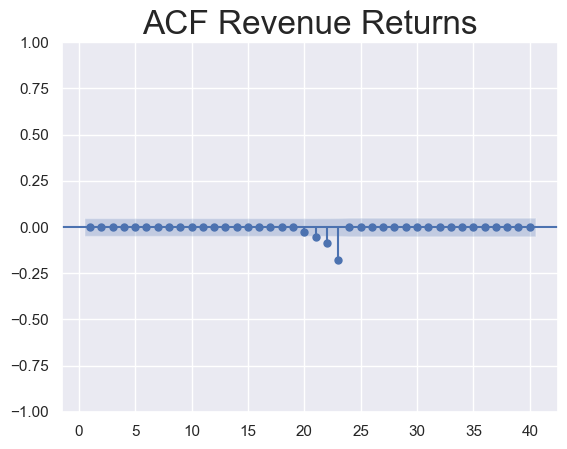

In [263]:
sgt.plot_acf(df.returns, lags = 40, zero = False)
plt.title('ACF Revenue Returns', size = 24)
plt.show()

PACF Revenue Returns

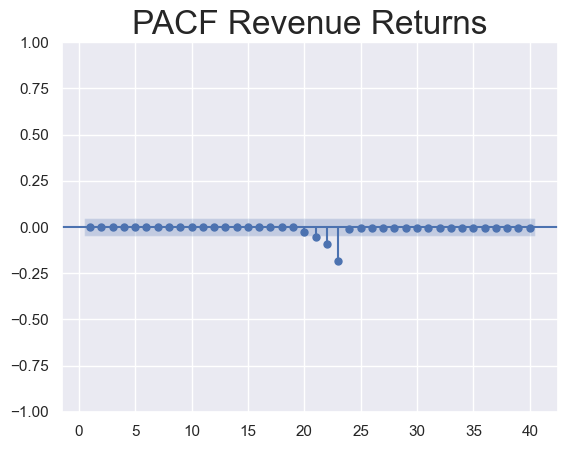

In [266]:
sgt.plot_pacf(df.returns, lags = 40, zero = False, method = ('ols'))
plt.title('PACF Revenue Returns', size = 24)
plt.show()

ACF and PACF graphs are same, and showing the same results

#### AR(1) for Returns

In [271]:
model_returns_ar = SARIMAX(df.returns, order=(1, 0, 0))
results_returns_ar = model_returns_ar.fit()
print(results_returns_ar.summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 1648
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -5582.631
Date:                Sun, 09 Feb 2025   AIC                          11169.262
Time:                        14:25:26   BIC                          11180.077
Sample:                    01-07-2015   HQIC                         11173.272
                         - 04-30-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       5.005e-06    388.079   1.29e-08      1.000    -760.620     760.620
sigma2        51.2727      0.200    256.639      0.000      50.881      51.664
Ljung-Box (L1) (Q):                   0.00   Jarque-

p value is 1.0, hence not significantly different from 0. Hence this model holds no real predictive power. \
The more easily yesterday's price is affected by higher lags, the more inaccurate its coefficient becomes. This directly decreases the predictive power of the model.

We need to test wether a higher lag model serves as a better predictor. AR(N+) > AR(1)

#### Higher-Lag AR(N) Models for Returns

In [278]:
model_returns_ar2 = SARIMAX(df.returns, order=(2, 0, 0))
results_returns_ar2 = model_returns_ar2.fit()
print(results_returns_ar2.summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 1648
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -5582.631
Date:                Sun, 09 Feb 2025   AIC                          11171.262
Time:                        14:37:44   BIC                          11187.484
Sample:                    01-07-2015   HQIC                         11177.277
                         - 04-30-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       5.009e-06    387.716   1.29e-08      1.000    -759.909     759.909
ar.L2       5.014e-06    387.346   1.29e-08      1.000    -759.184     759.184
sigma2        51.2727      0.200    256.634      0.0

In [280]:
model_returns_ar3 = SARIMAX(df.returns, order=(3, 0, 0))
results_returns_ar3 = model_returns_ar3.fit()
print(results_returns_ar3.summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 1648
Model:               SARIMAX(3, 0, 0)   Log Likelihood               -5582.631
Date:                Sun, 09 Feb 2025   AIC                          11173.262
Time:                        14:38:13   BIC                          11194.892
Sample:                    01-07-2015   HQIC                         11181.282
                         - 04-30-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       5.016e-06    387.212    1.3e-08      1.000    -758.921     758.921
ar.L2       5.019e-06    386.942    1.3e-08      1.000    -758.392     758.392
ar.L3       5.023e-06    386.661    1.3e-08      1.0

In [298]:
model_returns_ar23 = SARIMAX(df.returns, order=(23, 0, 0))
results_returns_ar23 = model_returns_ar23.fit()
print(results_returns_ar23.summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 1648
Model:              SARIMAX(23, 0, 0)   Log Likelihood               -5547.032
Date:                Sun, 09 Feb 2025   AIC                          11142.064
Time:                        14:55:06   BIC                          11271.840
Sample:                    01-07-2015   HQIC                         11190.182
                         - 04-30-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0215      0.063     -0.340      0.734      -0.146       0.103
ar.L2         -0.0116      0.099     -0.117      0.907      -0.205       0.182
ar.L3         -0.0045      0.161     -0.028      0.9

LLR test

In [285]:
LLR_test(model_returns_ar, model_returns_ar2)

1.0

In [287]:
LLR_test(model_returns_ar2, model_returns_ar3)

1.0

In [289]:
LLR_test(model_returns_ar3, model_returns_ar23)

0.0

We might think of using AR(23) model but also take a look at AIC, BIC and HQIC results for both models when comparing. \
Actually, need to compute these several times until another model will be reject. For example, here model23 is with p=0.0 so good, and then need to compute again, if model23 and model24 will show p>0.05 then we will be sure that model23 is good choice.

## Normalization

Normalization in the case of Time Series is to basically map every value of the sample space to the percentage of the first value of the set. The resulting series is much easier to compare with other time series. \
In general, by normalizing two time series, we can compare how well they perform relative to one another. (This gives us better understanding of which one to invest in and which one to avoid.)

#### Normalizing Values

1) Set some benchmark - Interpretaion seems easies if we simply go with the value for the first period.

In [330]:
benchmark = df.Revenue.iloc[0]
df['norm'] = df.Revenue.div(benchmark).mul(100)

C:\Users\khali\AppData\Local\Temp\ipykernel_17112\2991124409.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm'] = df.Revenue.div(benchmark).mul(100)


In [334]:
sts.adfuller(df.norm)

(-2.311897017249831,
 0.16815965135683347,
 23,
 1624,
 {'1%': -3.4343830457666806,
  '5%': -2.8633213561112156,
  '10%': -2.5677183557141645},
 12642.785372841805)

High p-value (p = 0.16) from DF test suggests non-stationarity thus normalizing prices did not result in stationary data. Therefore, we will not be able to use an AR model with the normalized prices. (However, normalization is still a great practice for comparing time series).

#### Normalizing Returns

`Caution! Not working Nan error`

In [446]:
bench_ret = df.returns.iloc[0]
df['norm_ret'] = df.returns.div(bench_ret).mul(100)
sts.adfuller(df.norm_ret)